In [1]:
###Logistic Regression & RForests

from collections import Counter
import pandas as pd
import numpy as np

#Handle Imbalance Data
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import smote_variants as sv

#ML ALgorithims
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, plot_importance

In [148]:
#Reading our data

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
df = pd.concat([train, test])
df_eval = pd.read_csv('pred.csv', index_col=0)

/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df = df.dropna(axis=0, subset=adv_stats)

In [6]:
train.columns

Index(['player_name', 'school', 'conference', 'GP', 'Min_per', 'ORtg', 'usg',
       'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM',
       'FTA', 'FT_per', '2PM', '2PA', '2P_per', '3PM', '3PA', '3P_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'rec-rk', 'ast/tov', 'rimmade',
       'rimmade + rimmiss', 'midmade', 'midmade + midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+mismiss)', 'dunksmade',
       'dunksmiss + dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'pos', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'ht_in',
       'drafted', 'yr_cat', 'ATH', 'GP_adj', 'BBIQ'],
      dtype='object')

In [5]:
#stats to look at

per_stats = ['Min_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FT_per', '2P_per', '3P_per', 
             'blk_per', 'stl_per', 'GP', 'ht_in', 'yr_cat',  'ATH', 'BBIQ']
box_stats = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg','oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'FTA', 'FTM', 'ftr',  'ATH', 'BBIQ']
adv_stats = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM', 'ftr' ,'ATH', 'BBIQ']

per_adv = ['Min_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FT_per', '2P_per', '3P_per', 
             'blk_per', 'stl_per', 'GP', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'ATH', 'BBIQ']

all_stats = ['GP', 'Min_per', 'ORtg', 'usg',
       'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM',
       'FTA', 'FT_per', '2PM', '2PA', '2P_per', '3PM', '3PA', '3P_per',
       'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe',
       'pfr','year', 'rec-rk', 'ast/tov', 
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'yr_cat', 'ht_in']

In [8]:
adv_stats = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM', 'ftr' ,'ATH', 'BBIQ']

adv_stats2 = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'dreb', 'treb', 'ftr',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM','ATH']

adv_stats3 = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'treb', 'ftr',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM','ATH']

adv_stats4 = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'treb', 'ftr',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'FTA', 'FTM','ATH']

adv_stats5 = ['GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PM_pg', 'oreb', 'treb', 'ftr',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'FTA', 'FTM','ATH']

tests = [adv_stats, adv_stats2, adv_stats3, adv_stats4, adv_stats5]

In [9]:
#delete all missing values
train = train.dropna(axis=0, subset=per_stats)
train = train.dropna(axis=0, subset=box_stats)
train = train.dropna(axis=0, subset=adv_stats)

#delete mssing value in test set as well

test = test.dropna(axis=0, subset=per_stats)
test = test.dropna(axis=0, subset=box_stats)
test = test.dropna(axis=0, subset=adv_stats)

In [10]:
#set our 2 test-set aside
test_2018 = test[test['year']==2018]
test_2019 = test[test['year']==2019]

In [11]:
train_3 = pd.concat([train, test_2018])
train3 = train_3[(train_3['bpm']>= -0.6) & (train_3['pts']>= 3) & (train_3['ht_in']>= 72)] 

In [ ]:
#grid search cv
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}



grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(train3[adv_stats], train3['drafted'])

In [260]:
print(grid_search)
# summarize the results of the grid search
print(grid_search.best_score_)
print(grid_search.best_params_)

GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='f1', verbose=True)
0.5557360754196373
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 180}


In [254]:
samples = [0.1, 0.125, 0.15, 0.175, 0.2]

for i in samples:

    model = XGBClassifier()
    over = SMOTE(sampling_strategy=i)
    under = RandomUnderSampler(sampling_strategy=i)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(train_3[adv_stats], train_3['drafted'])
    model.fit(X, y)
    y_pred = model.predict_proba(test_2019[adv_stats])

    predictions = [np.round(value[1]) for value in y_pred]

    #roc_auc = roc_auc_score(test_2019['drafted'], predictions)
    f1 = f1_score(test_2019['drafted'], predictions)
    recall = recall_score(test_2019['drafted'], predictions)
    precision = precision_score(test_2019['drafted'], predictions)
    print('F1: {} recall: {} precision: {} predictions: {}'.format(f1, recall, precision, sum(predictions)))
    #plot_importance(model)


F1: 0.4742268041237114 recall: 0.45098039215686275 precision: 0.5 predictions: 46.0
F1: 0.495049504950495 recall: 0.49019607843137253 precision: 0.5 predictions: 50.0
F1: 0.4807692307692308 recall: 0.49019607843137253 precision: 0.4716981132075472 predictions: 53.0
F1: 0.4464285714285714 recall: 0.49019607843137253 precision: 0.4098360655737705 predictions: 61.0
F1: 0.46666666666666673 recall: 0.5490196078431373 precision: 0.4057971014492754 predictions: 69.0


In [219]:
prob = []

for i in range(0,len(test_2019)):
    prob.append(y_pred[i][1])

In [220]:
test_2019['pred_prob'] = prob
test_2019['draft_pred'] = predictions

In [13]:
adv_stats_res = ['player_name', 'year','GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM', 'ftr' ,'ATH', 'BBIQ', 'pick', 'drafted', 'draft_pred','pred_prob']


In [222]:
res_table = test_2019[adv_stats_res].sort_values('pred_prob', ascending=False)

In [223]:
res_res = res_table[(res_table['pred_prob']>= 0.5) | (res_table['pick']> 0)]

In [224]:
res_res.to_excel('results_xgb.xlsx', index=True)

F1: 0.41860465116279066 recall: 0.35294117647058826 precision: 0.5142857142857142 predictions: 35.0


"\nprob = []\n\nfor i in range(0,len(test_2018)):\n    prob.append(y_pred[i][1])\n\ntest_2019['pred_prob'] = prob\ntest_2019['draft_pred'] = predictions\n\nres_table = test_2019[adv_stats_res].sort_values('pred_prob', ascending=False)\nres_res = res_table[(res_table['pred_prob']>= 0.5) | (res_table['pick']> 0)]\nres_res.to_excel('results_xgb_2019.xlsx', index=True)"

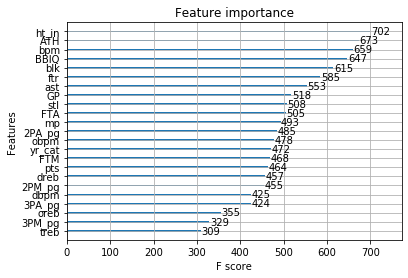

In [19]:
model = XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=180)
over = SMOTE(sampling_strategy=0.125)
under = RandomUnderSampler(sampling_strategy=0.125)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(train_3[adv_stats], train_3['drafted'])
model.fit(X, y)
y_pred = model.predict_proba(test_2019[adv_stats])

predictions = [np.round(value[1]) for value in y_pred]

#roc_auc = roc_auc_score(test_2019['drafted'], predictions)
f1 = f1_score(test_2019['drafted'], predictions)
recall = recall_score(test_2019['drafted'], predictions)
precision = precision_score(test_2019['drafted'], predictions)
print('F1: {} recall: {} precision: {} predictions: {}'.format(f1, recall, precision, sum(predictions)))
plot_importance(model)


'''
prob = []

for i in range(0,len(test_2018)):
    prob.append(y_pred[i][1])

test_2019['pred_prob'] = prob
test_2019['draft_pred'] = predictions

res_table = test_2019[adv_stats_res].sort_values('pred_prob', ascending=False)
res_res = res_table[(res_table['pred_prob']>= 0.5) | (res_table['pick']> 0)]
res_res.to_excel('results_xgb_2019.xlsx', index=True)'''



In [21]:
#K-Fold Cross Validation

years = [2011, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

for i in years:
    
    print('year {}'.format(i))
    df_train = df[df['year']!=i]
    train = df_train[(df_train['bpm']>= -0.6) & (df_train['pts']>= 3) & (df_train['ht_in']>= 72)] 
    test = df[df['year']==i]
    
    model = XGBClassifier()
    over = SMOTE(sampling_strategy=0.125)
    under = RandomUnderSampler(sampling_strategy=0.125)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(train[adv_stats], train['drafted'])
    model.fit(X, y)
    y_pred = model.predict_proba(test[adv_stats])

    predictions = [np.round(value[1]) for value in y_pred]

    #roc_auc = roc_auc_score(test_2019['drafted'], predictions)
    f1 = f1_score(test['drafted'], predictions)
    recall = recall_score(test['drafted'], predictions)
    precision = precision_score(test['drafted'], predictions)
    print('F1: {} recall: {} precision: {} predictions: {}'.format(f1, recall, precision, sum(predictions)))
    #plot_importance(model)


year 2011
F1: 0.5909090909090909 recall: 0.5652173913043478 precision: 0.6190476190476191 predictions: 42.0
year 2010
F1: 0.42718446601941745 recall: 0.41509433962264153 precision: 0.44 predictions: 50.0
year 2012
F1: 0.45833333333333337 recall: 0.41509433962264153 precision: 0.5116279069767442 predictions: 43.0
year 2013
F1: 0.46913580246913583 recall: 0.41304347826086957 precision: 0.5428571428571428 predictions: 35.0
year 2014
F1: 0.4444444444444445 recall: 0.4 precision: 0.5 predictions: 36.0
year 2015
F1: 0.4578313253012048 recall: 0.3877551020408163 precision: 0.5588235294117647 predictions: 34.0
year 2016
F1: 0.39560439560439564 recall: 0.3829787234042553 precision: 0.4090909090909091 predictions: 44.0
year 2017
F1: 0.5490196078431373 recall: 0.5490196078431373 precision: 0.5490196078431373 predictions: 51.0
year 2018
F1: 0.4565217391304348 recall: 0.39622641509433965 precision: 0.5384615384615384 predictions: 39.0
year 2019
F1: 0.49484536082474223 recall: 0.47058823529411764 pr

In [77]:
#K-Fold Cross Validation

years = [2011, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
pred_prob = []
result_f1 = []
result_recall = []
result_precision = []

for i in years:
    
    print('year {}'.format(i))
    df_train = df[df['year']!=i]
    train = df_train[(df_train['bpm']>= -0.6) & (df_train['pts']>= 3) & (df_train['ht_in']>= 72)] 
    test = df[df['year']==i]
    
    model = XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=180)
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.2)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(train[adv_stats], train['drafted'])
    model.fit(X, y)
    y_pred = model.predict_proba(test[adv_stats])
    pred_prob.append(y_pred)

    predictions = [np.round(value[1]) for value in y_pred]

    #roc_auc = roc_auc_score(test_2019['drafted'], predictions)
    f1 = f1_score(test['drafted'], predictions)
    recall = recall_score(test['drafted'], predictions)
    precision = precision_score(test['drafted'], predictions)
    result_f1.append(f1)
    result_recall.append(recall)
    result_precision.append(precision)
    print('F1: {} recall: {} precision: {} predictions: {}'.format(f1, recall, precision, sum(predictions)))
    #plot_importance(model)



year 2011
F1: 0.42666666666666664 recall: 0.34782608695652173 precision: 0.5517241379310345 predictions: 29.0
year 2010
F1: 0.4835164835164836 recall: 0.41509433962264153 precision: 0.5789473684210527 predictions: 38.0
year 2012
F1: 0.375 recall: 0.2830188679245283 precision: 0.5555555555555556 predictions: 27.0
year 2013
F1: 0.5185185185185185 recall: 0.45652173913043476 precision: 0.6 predictions: 35.0
year 2014
F1: 0.41558441558441556 recall: 0.35555555555555557 precision: 0.5 predictions: 32.0
year 2015
F1: 0.425 recall: 0.3469387755102041 precision: 0.5483870967741935 predictions: 31.0
year 2016
F1: 0.46341463414634143 recall: 0.40425531914893614 precision: 0.5428571428571428 predictions: 35.0
year 2017
F1: 0.4395604395604396 recall: 0.39215686274509803 precision: 0.5 predictions: 40.0
year 2018
F1: 0.32911392405063294 recall: 0.24528301886792453 precision: 0.5 predictions: 26.0
year 2019
F1: 0.4545454545454546 recall: 0.39215686274509803 precision: 0.5405405405405406 predictions:

In [126]:
adv_stats_res = ['player_name', 'year','GP', 'mp', 'pts', '2PA_pg', '2PM_pg', '3PA_pg', '3PM_pg', 'oreb', 'dreb', 'treb',
             'ast', 'stl', 'blk', 'ht_in', 'yr_cat', 'bpm', 'obpm', 'dbpm', 'FTA', 'FTM', 'ftr' ,'ATH', 'BBIQ', 'pick', 'drafted', 'pred_pick','pred_prob']

In [140]:
#K-Fold Cross Validation

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
pred_prob = []
pred_pick = []
result_f1 = []
result_recall = []
result_precision = []

writer = pd.ExcelWriter('result_.xlsx')

for i in years:
    
    print('year {}'.format(i))
    df_train = df[df['year']!=i]
    train = df_train[(df_train['bpm']>= -0.6) & (df_train['pts']>= 3) & (df_train['ht_in']>= 72)] 
    test = df[df['year']==i]
    
    model = XGBClassifier()
    over = SMOTE(sampling_strategy=0.125)
    under = RandomUnderSampler(sampling_strategy=0.125)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(train[adv_stats], train['drafted'])
    model.fit(X, y)
    y_pred = model.predict_proba(test[adv_stats])
    #pred_prob.append(y_pred)

    predictions = [np.round(value[1]) for value in y_pred]
    #pred_pick.append(predictions)
    #roc_auc = roc_auc_score(test_2019['drafted'], predictions)
    f1 = f1_score(test['drafted'], predictions)
    recall = recall_score(test['drafted'], predictions)
    precision = precision_score(test['drafted'], predictions)
    result_f1.append(f1)
    result_recall.append(recall)
    result_precision.append(precision)
    print('F1: {} recall: {} precision: {} predictions: {}'.format(f1, recall, precision, sum(predictions)))
    
    #add onto sheet
    test['pred_prob'] = [value[1] for value in y_pred]
    test['pred_pick'] = predictions
    res_table = test[adv_stats_res].sort_values('pred_prob', ascending=False)
    res_res = res_table[(res_table['pred_pick']== 1) | (res_table['pick']> 0)]
    res_res.to_excel(writer, sheet_name = '{}'.format(i))

writer.save()
    
    #plot_importance(model)


year 2010
F1: 0.4854368932038835 recall: 0.4716981132075472 precision: 0.5 predictions: 50.0
year 2011


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.5909090909090909 recall: 0.5652173913043478 precision: 0.6190476190476191 predictions: 42.0
year 2012


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.42105263157894735 recall: 0.37735849056603776 precision: 0.47619047619047616 predictions: 42.0
year 2013


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.47058823529411764 recall: 0.43478260869565216 precision: 0.5128205128205128 predictions: 39.0
year 2014


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.5060240963855421 recall: 0.4666666666666667 precision: 0.5526315789473685 predictions: 38.0
year 2015


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.4444444444444445 recall: 0.3673469387755102 precision: 0.5625 predictions: 32.0
year 2016


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.44680851063829785 recall: 0.44680851063829785 precision: 0.44680851063829785 predictions: 47.0
year 2017


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.5599999999999999 recall: 0.5490196078431373 precision: 0.5714285714285714 predictions: 49.0
year 2018


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.42696629213483145 recall: 0.3584905660377358 precision: 0.5277777777777778 predictions: 36.0
year 2019


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


F1: 0.4742268041237114 recall: 0.45098039215686275 precision: 0.5 predictions: 46.0


/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/leotsang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [158]:
###on our eval set

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
pred_prob = []
pred_pick = []
result_f1 = []
result_recall = []
result_precision = []

writer = pd.ExcelWriter('result_2020_MLP.xlsx')

for i in 
    
    #print('year {}'.format(i))
    df_train = df
    train = df_train[(df_train['bpm']>= -0.6) & (df_train['pts']>= 3) & (df_train['ht_in']>= 72)] 
    df_eval = df_eval[(df_eval['bpm']>= -0.6) & (df_eval['pts']>= 3) & (df_eval['ht_in']>= 72)] 
    #test = df[df['year']==i]

    model = XGBClassifier()
    over = SMOTE(sampling_strategy=0.125)
    under = RandomUnderSampler(sampling_strategy=0.125)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(train[adv_stats], train['drafted'])
    model.fit(X, y)
    y_pred = model.predict_proba(df_eval[adv_stats])
    #pred_prob.append(y_pred)

    predictions = [np.round(value[1]) for value in y_pred]
    #pred_pick.append(predictions)
    #roc_auc = roc_auc_score(test_2019['drafted'], predictions)
    #f1 = f1_score(test['drafted'], predictions)
    #recall = recall_score(test['drafted'], predictions)
    #precision = precision_score(test['drafted'], predictions)
    #result_f1.append(f1)
    #result_recall.append(recall)
    #result_precision.append(precision)
    #print('F1: {} recall: {} precision: {} predictions: {}'.format(f1, recall, precision, sum(predictions)))
    print('predictions', sum(predictions))
    #add onto sheet
    df_eval['pred_prob'] = [value[1] for value in y_pred]
    df_eval['pred_pick'] = predictions
    res_table = df_eval[adv_stats_res].sort_values('pred_prob', ascending=False)
    res_res = res_table[(res_table['pred_pick']== 1) | (res_table['pick']> 0)]
    res_res.to_excel(writer, sheet_name = '{}'.format(i))

writer.save()

predictions 27.0


In [142]:
np.mean(result_f1), np.mean(result_recall), np.mean(precision)

(0.48100940575993917, 0.44748468636752176, 0.5)